# Visualizing the Spherical harmonics

## Setup

In [1]:
import math
import numpy as np
import torch

from torch_harmonics.quadrature import legendre_gauss_weights
from torch_harmonics.legendre import legpoly, clm
from torch_harmonics import RealSHT, InverseRealSHT

## Forming the Vandermonde matrix

In [2]:
nlat = 60
nlon = 2*nlat
lmax = mmax = nlat

sht = RealSHT(nlat, nlon, lmax=lmax, mmax=mmax)
isht = InverseRealSHT(nlat, nlon, lmax=lmax, mmax=mmax)

In [3]:
# forming the Vandermonde matrix

nmodes = int(lmax * (lmax+1) / 2)
e = torch.zeros(nmodes, lmax, mmax, dtype=torch.complex64)

midx = lambda l,m : l*(l+1)//2 + m

for l in range(lmax):
    for m in range(l+1):
        e[midx(l,m), l, m] = 1.0

vdm = isht(e)

## Plotting the Spherical Harmonics

In [4]:
import matplotlib.pyplot as plt
from plotting import plot_sphere

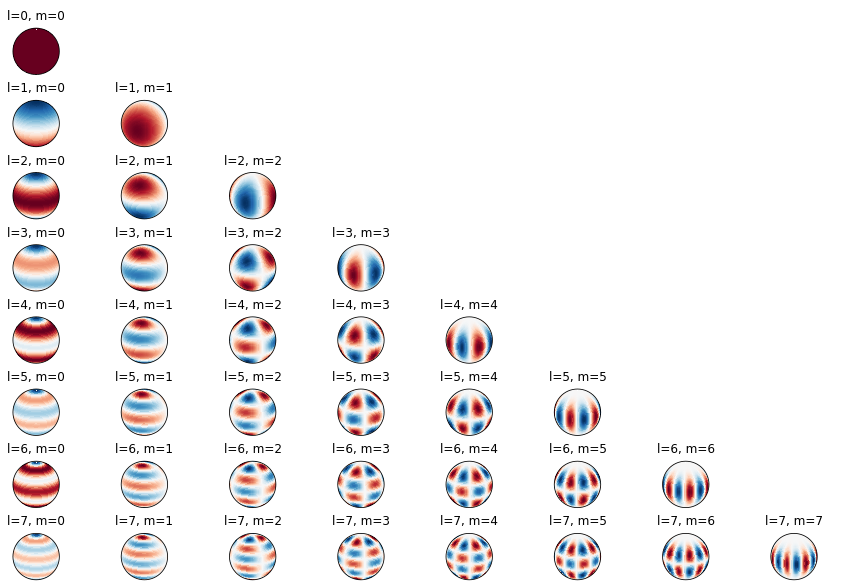

In [6]:
plt_lmax = 8

fig = plt.figure(layout='constrained', figsize=(12, 8))
subfigs = fig.subfigures(plt_lmax, plt_lmax)

for l in range(plt_lmax):
    for m in range(l+1):
        plot_sphere(vdm[midx(l,m)], fig=subfigs[l, m], title=f"l={l}, m={m}")

let's also make an animated version:

In [6]:
import matplotlib.animation as animation

fig = plt.figure(layout='constrained', figsize=(12, 8), dpi=72)
subfigs = fig.subfigures(plt_lmax, plt_lmax)

moviewriter = animation.writers['pillow'](fps=30)
moviewriter.setup(fig, 'spherical_harmonics.gif', dpi=72)

<Figure size 864x576 with 0 Axes>

frame=0
frame=10
frame=20
frame=30
frame=40
frame=50
frame=60
frame=70
frame=80
frame=90
frame=100
frame=110


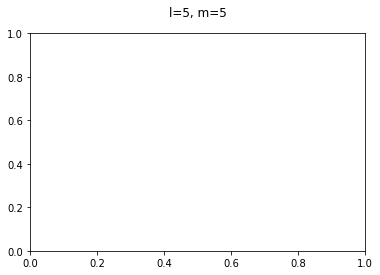

In [7]:
for frame in range(120):
    # compute the rotation of the sphere
    lon = -120 - 3 * frame

    if frame % 10 == 0:
        print(f"frame={frame}")

    for l in range(plt_lmax):
        for m in range(l+1):
            plot_sphere(vdm[midx(l,m)], fig=subfigs[l, m], title=f"l={l}, m={m}", central_longitude=lon)

    plt.draw()
    moviewriter.grab_frame()

moviewriter.finish()